# World Happiness Report 2021 EDA 🌍 


## Introduction 
In this EDA Project with Python, I will be analyzing the World Happiness Report for 2021. The World Happiness Repory is a landmark survey for the state of global happiness. The happiness scores and rankings use data fron the Gallup World Poll. 
 
We will be anayzing the dataset to discover trends and find correlation between happines score and other factors represented in the dataset. The dataset was featured on Kaggle and was manually downloaded from the website. Some popular variables in the dataset include:
- Region: This is the region of the various countries
- Country_name: The different countries represnted in the dataset 
- Happiness_score: This indicates the happiness score of country in the Region 
- GDP_per_capita: GDP indicates the country's GDP divided by its total population represnted in logged value 

## Preliminary Wrangling 
 Before proceeding to analysis and visualization, we first have to clean the datset to make it tidy for use. We will be checking for null values and also be droping some columns that we wouldn't be needing for this analysis. Let's proceed to examining the dataset to assess the quality and tidiness, then do some cleaning.  

In [13]:
# Import libraries 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Set parameters 

sns.set_style ('white')
plt.rcParams ['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = 'FFFFFF'

In [15]:
# Load dataset (csv file)

data = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Datasets (Updated)/World Happiness Data (2019-2022)/whr_2021.csv')

In [16]:
# Display first 5 rows of datset using head() function 

data.head()

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


### Selecting columns
We will select the columns needed for our analysis. NB: Part of this step was done before loading the dataset into Jupyter notebook

In [17]:
# Select columns we will need for our analysis 

data_columns = ['Country name','Regional indicator','Happiness score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [18]:
# Copy dataset

data=data[data_columns].copy()

In [19]:
# Rename dataset and columns

happy_df = data.rename({'Country name': 'country','Regional indicator': 'region', 'Happiness score': 'happiness_score','GDP per capita':'GDP_per_capita','Social support': 'social_support','Healthy life expectancy':'health_life_expectancy', 'Freedom to make life choices':'freedom_to_make_life_choices', 'Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'},axis = 1)

In [20]:
# Display first 5 rows of new dataset

happy_df.head()

,country,region,happiness_score,GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [21]:
# Find null values in the dataset

happy_df.isnull(). sum()

country                         0
region                          0
happiness_score                 0
GDP_per_capita                  0
social_support                  0
health_life_expectancy          0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

### Features of Interest
The main interest in this dataset would be the happiness_score. Asides the happiness score, I will like to know the GDP per capita of countries in different regions.

### Questions 
1. What is the relationship between GDP_per_capita and happiness_score in different regions?
2. what is the GDP_per_capita of different regions? 
3. How many countries are in each region?
4. What is the average perception of corruption in each region?
5. What is the life expectancy of the top 10 and bottom 10 happiest countries?
6. What is the correlation between happiness score and freedom to make life choices?


### Relationship between GDP per capita and Happiness Score 
 What is the relationship between GDP per capita of the different countries and happiness score

### Visualization 

Text(0, 0.5, 'GDP per capita')

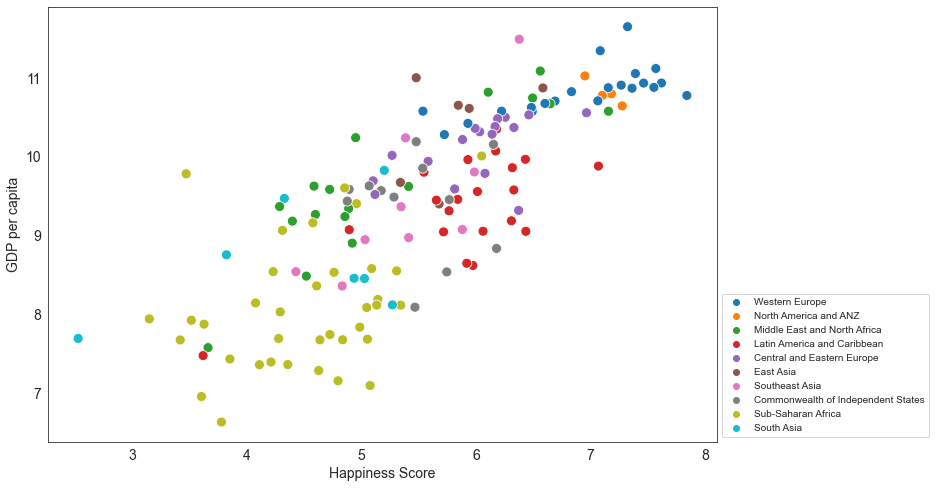

In [27]:
# Plot the relationship between Happiness Score and GDP per capita

plt.rcParams['figure.figsize'] = (12,8)
plt.title = ('Happiness and GDP')
sns.scatterplot(x = happy_df.happiness_score, y= happy_df.GDP_per_capita, hue = happy_df.region, s = 100);
plt.legend(bbox_to_anchor=(1, 0),loc = 'lower left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel('GDP per capita')


### Add line of best fit 
We will add a line of best fit to help us determine the relationship between the data points

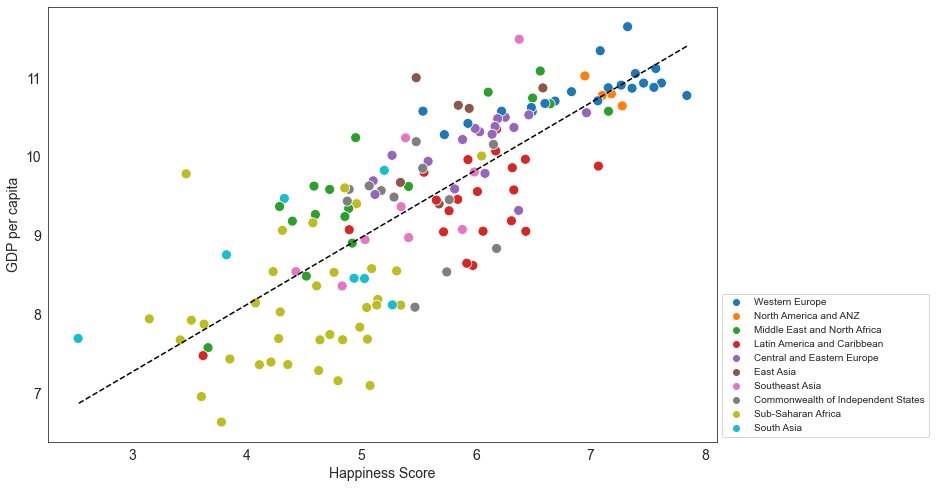

In [30]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title = ('Happiness and GDP')
sns.scatterplot(x = happy_df.happiness_score, y= happy_df.GDP_per_capita, hue = happy_df.region, s = 100);
plt.legend(bbox_to_anchor=(1, 0),loc = 'lower left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel('GDP per capita')
x = happy_df.happiness_score
y = happy_df.GDP_per_capita
a,b = np.polyfit(x,y,1)
plt.plot(x,a*x + b, color = 'black', linestyle = '--')


### Observation 
From the scatterplot above, we can see countries from Western Europe have the highset GDP per capita and also have high happiness scores. We can also see that countires from the Sub-Saharan Africa Region have low GDP per capita and their happiness score is also quite low. The line of best fit shows us that there is a positive linear relationship between both variables. However, there is a country form the South Asian region which seems to be like an oulier, it has the lowest happiness score but has a GDP per capita higher than some countries in other regions; this country is most likely Afghanistan. 

### What is the sum of  logged GDP per capita in the different regions?
To answer this question we will call the groupby() function on the region column and  the sum() function on the GDP per capita column of the dataset

In [13]:
GDP_per_region = happy_df.groupby('region')[['GDP_per_capita']].sum()
GDP_per_region

,GDP_per_capita
region,
Central and Eastern Europe,171.854
Commonwealth of Independent States,112.822
East Asia,62.206
Latin America and Caribbean,187.400
Middle East and North Africa,164.324
North America and ANZ,43.238
South Asia,60.778
Southeast Asia,84.793
Sub-Saharan Africa,290.707


### Visualization

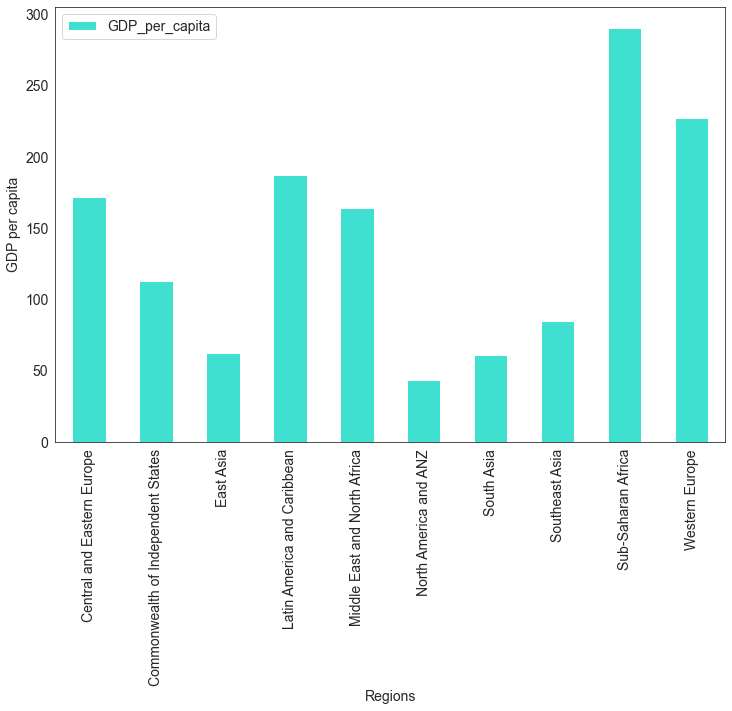

In [14]:
ax = GDP_per_region.plot.bar(figsize=(12,8),ylabel = 'GDP per capita', xlabel = 'Regions', color = 'turquoise')
plt.title = ('GDP by Region')


### Observation
From the barplot, we can see that Sub-Saharan Africa recorded the highest GDP per capita. The lowest GDP per capita was recorded in the North America and ANZ region. A possible reason for this will be revealed when we answer our next question.

### How many countries are in each region?
We will answer this question by calling the groupby() function on the region column and the count() function on the country column. 

In [15]:
#Total number of countries in each region

total_country = happy_df.groupby('region')[['country']].count()
total_country

,country
region,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


### Observation
The table above shows the number of countries in each region represented in the dataset. We can tell form the table that the Sub-Saharan Africa region had the highest number of countries represented in the dataset (36), while the North America and ANZ region recorded the least countries with only 4 countries represented in the dataset. This can be attributed as the reason for the values of the GDP per capita recorded.

### Visualization of a correlation heatmap showing the relationship between the different variables
We will visualize the correlation between the variables using a heatmap. 

<AxesSubplot:>

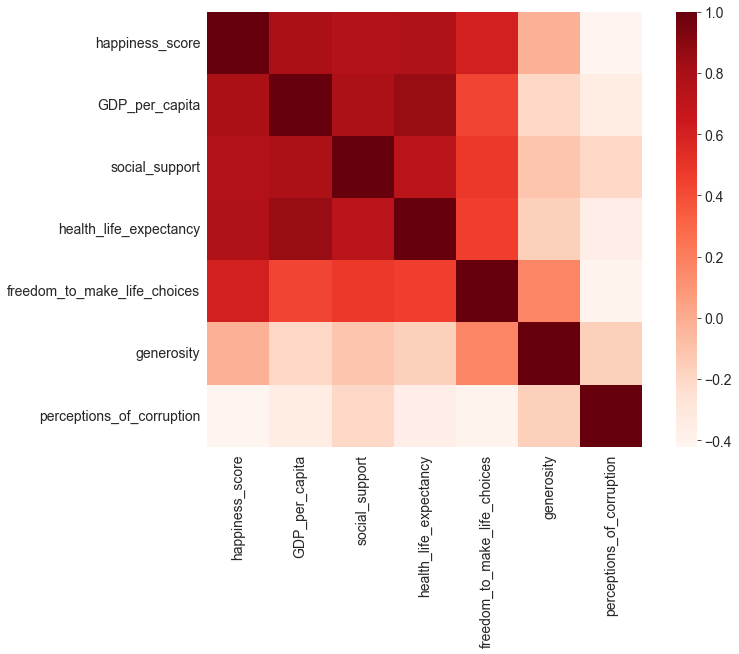

In [16]:
# Creating a correlation Map

cor = happy_df.corr(method = 'pearson')
f,ax = plt.subplots(figsize = (12,8))
sns.heatmap(cor,mask = np.zeros_like(cor,dtype =bool),cmap = 'Reds',square = True, ax = ax)

### Observation and Interpretation 
The heatmap above shows us the correlation between the variables. The darker shades show that there is correlation between the compared variables (using the legend as a guide), the higher the correlation. The darker the shade of red, the higher the correlation. For example, there is high correlation between social support and happiness score i.e when there is social support from the government the citizens of the country will be happier. 

### What is the average rate of perception of corruption in the different regions?
For this question we will be using the groupby() function and the mean() function. We will call the groupby() function on the region column and the mean() function on the 'perceptions_of_corruption' column.

In [17]:
# Perception of corruption in Regions 

corruption = happy_df.groupby('region')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
region,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


### Visualization

<BarContainer object of 10 artists>

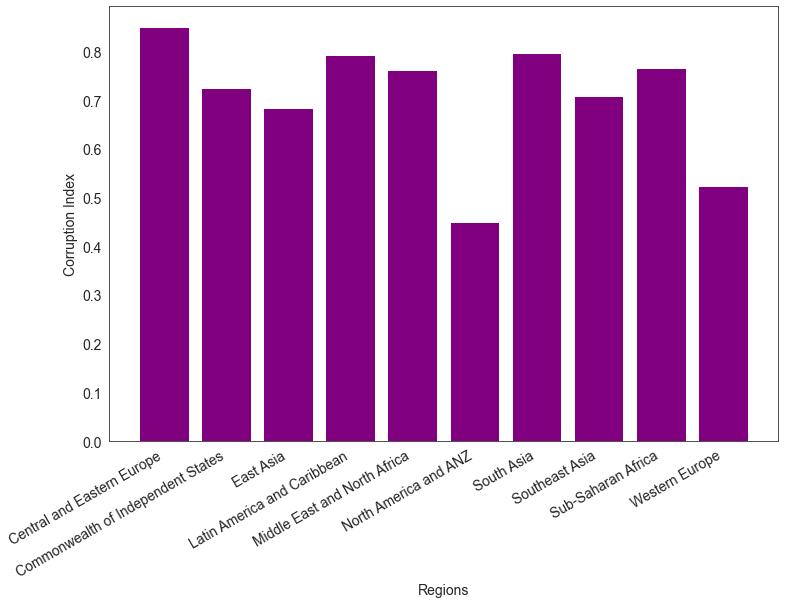

In [18]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title = ('Perceptions of Corruption in Regions')
plt.xlabel ('Regions', fontsize = 14)
plt.ylabel ('Corruption Index', fontsize =  14)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index,corruption.perceptions_of_corruption, color = 'purple')

### Observation
From the barplot, we can see that the corruption index is highest in the Central and Eastern Europe and the North America and ANZ region recorded the lowest corruption index


#### What countries were considered the happiest countries and the least happiest or if you like 'saddest' countries?

In [19]:
# Top 10 and bottom 10 happiest countries 

top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

### Visualization
We will now visualize the life expectancy of the top ten and bottom ten happiest countries. We will be visualizing them on a bar plot. These bar plot will be plotted side by side, to do this we will be calling the plt.subplots() function.

Text(600.6068181818181, 0.5, 'Life Expectancy')

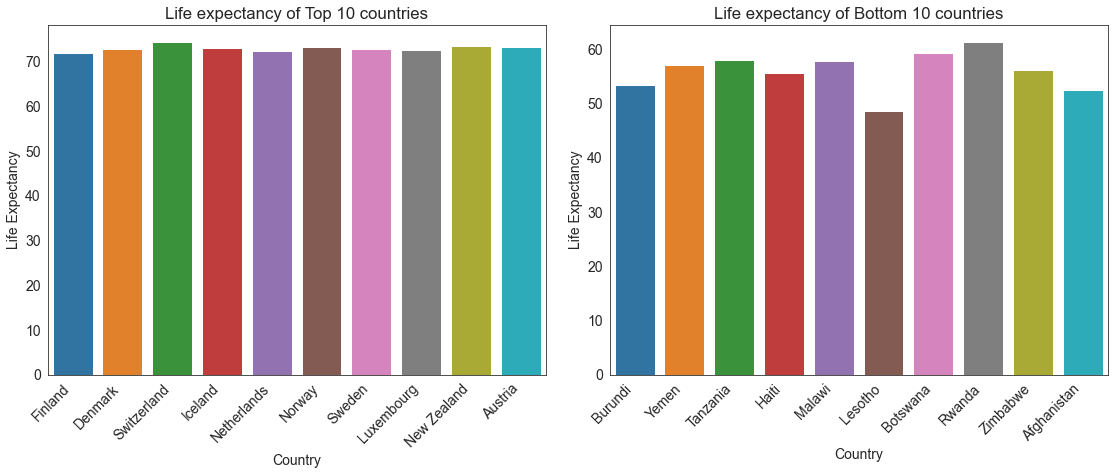

In [20]:
fig,axes =plt.subplots (1,2,figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.country
axes[0].set_title('Life expectancy of Top 10 countries')
axes[0].set_xticks(top_10.health_life_expectancy)
axes[0].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x=top_10.country,y= top_10.health_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.country
axes[1].set_title('Life expectancy of Bottom 10 countries')
axes[1].set_xticks(bottom_10.health_life_expectancy)
axes[1].set_xticklabels(xlabels,rotation = 45, ha = 'right')
sns.barplot(x= bottom_10.country,y=bottom_10.health_life_expectancy, ax =axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life Expectancy')

### Observation
We can see from the plots above that the average life expactancy for the top 10 happiest countries is about 70 years. However, the life expectancy for the least happiest countires is between 50-60 years.

### Visualizing the correlation between freedom to make life choices and happiness score
We will be using a scatter plot to visualize the relationship between freedom to make life choices and happines score in different countries.

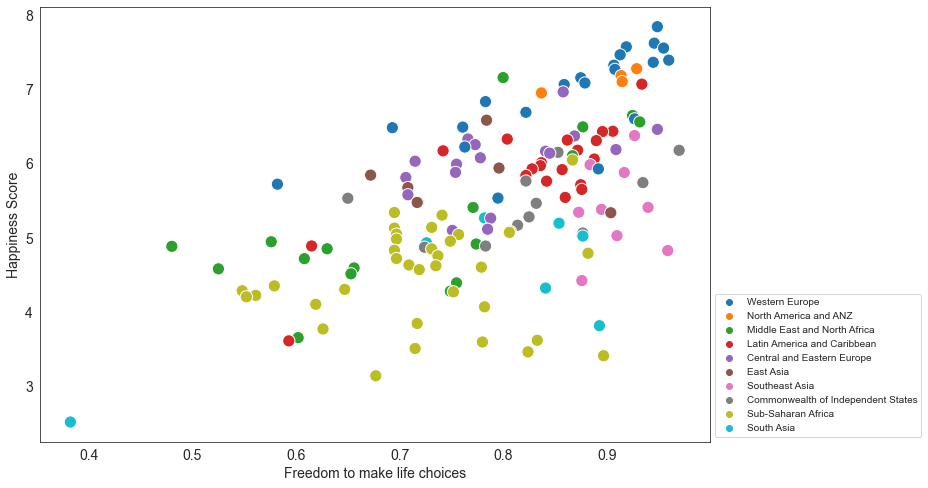

In [21]:
# Creating a scatter plot.

plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(x =happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue = happy_df.region, s = 150)
plt.legend(bbox_to_anchor=(1, 0),loc = 'lower left', fontsize = '10')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title =('Freedom to make life choices and Happiness Score')

#### * We will add our line of best fit again to help us get a clearer undertsnading of the type of relationship

<function matplotlib.pyplot.show(close=None, block=None)>

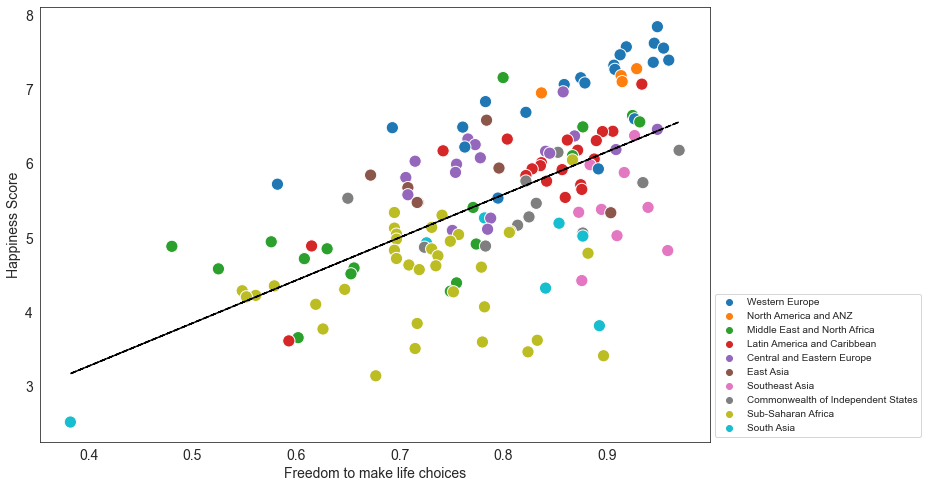

In [32]:
# Adding line of best fit to the plot 
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(x =happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue = happy_df.region, s = 150)
plt.legend(bbox_to_anchor=(1, 0),loc = 'lower left', fontsize = '10')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title =('Freedom to make life choices and Happiness Score')
x = happy_df.freedom_to_make_life_choices
y = happy_df.happiness_score
a,b = np.polyfit(x,y,1)
plt.plot(x,a*x + b, color = 'black', linestyle = '--')


### Observation 
With the use of the line of best fit, we can see that there is a positive linear relationship between the two variables, however, it is not a strong relationship as the most of the data points are far from the line of best fit.

### Conclusion 
When I came across this dataset and browsed through the columns, I thought the happiness score will be largely influenced by the freedom to make life choices. The analysis and visualization showed otherwise. I expected that life expectancy and social support would have a strong correlation with the happiness score and they did. A lot of insights were derived from the dataset.  